In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn import preprocessing

rawData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
rawData.head(n=5)

#rawData_le = rawData.apply(preprocessing.LabelEncoder().fit_transform)
#rawData_le.describe

#rawData.dropna(inplace=True)
#testData.dropna(inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dealing with missing data: NaN

<IPython.core.display.Javascript object>


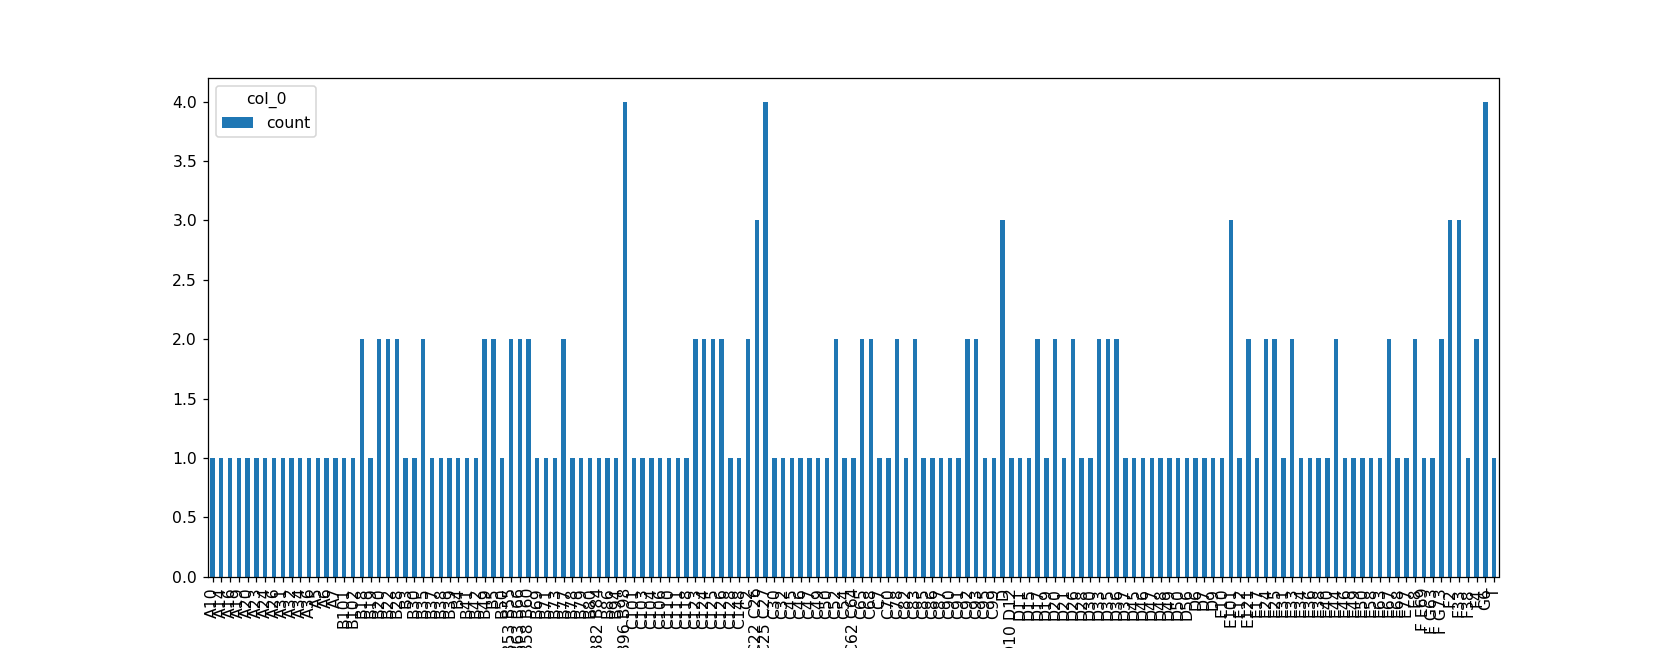

In [44]:
%matplotlib notebook
my_tab = pd.crosstab(index = rawData["Cabin"], columns="count")      # Name the count column
my_tab.plot.bar()

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
X                            = trainData.loc[:, trainData.columns != 'Survived'] 
Y                            = trainData['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Decision Tree Model

In [33]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)
for name, rank in sorted(zip(X_train.columns, clf.feature_importances_), key = lambda t: t[1]):
    print(name, rank)
print("Train and test dataset score = ", clf.score(X_train, Y_train), clf.score(X_test, Y_test))

Pclass 0.0
Parch 0.0
Embarked 0.0
SibSp 0.0171679197995
Name 0.0536559674034
Cabin 0.0623389048602
Ticket 0.0655022170812
Fare 0.0772262922263
PassengerId 0.170761818655
Age 0.258358556651
Sex 0.294988323323
Train and test dataset score =  1.0 0.717391304348


### Random forest model

In [31]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import ExtraTreesRegressor as ETR
rfmodel = RF(n_estimators=500)
rfmodel.fit(X_train, Y_train)
for name, rank in sorted(zip(X_train.columns, rfmodel.feature_importances_), key = lambda t: t[1]):
    print(name, rank)
print("Train and test dataset score = ", rfmodel.score(X_train, Y_train), rfmodel.score(X_test, Y_test))

Pclass 0.00173252210108
Parch 0.00857549775589
Embarked 0.00867834856855
SibSp 0.0127209955611
Cabin 0.0789981770132
Fare 0.0915958122752
Ticket 0.0935025818096
PassengerId 0.108762270004
Name 0.141896585136
Age 0.156628272663
Sex 0.296908937112
Train and test dataset score =  0.895582651629 0.332564460317
